This example depicts a voltage multiplier using diodes and capacitors.
To go further, you can read this
[page](http://en.wikipedia.org/wiki/Voltage_multiplier) on Wikipedia.


In [ ]:


import matplotlib.pyplot as plt


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Doc.ExampleTools import find_libraries
from PySpice import SpiceLibrary, Circuit, Simulator, plot
from PySpice.Unit import *


libraries_path = find_libraries()
spice_library = SpiceLibrary(libraries_path)




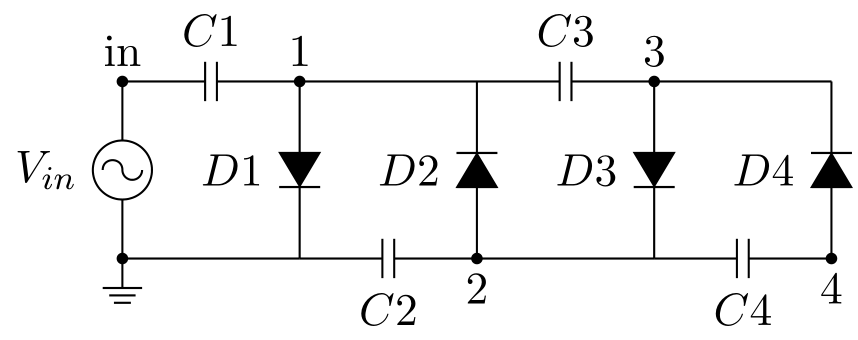

In [ ]:

circuit = Circuit('Voltage Multiplier')
circuit.include(spice_library['1N4148'])
source = circuit.SinusoidalVoltageSource('input', 'in', circuit.gnd, amplitude=10@u_V, frequency=50@u_Hz)

multiplier = 5
for i in range(multiplier):
    if i:
        top_node = i - 1
    else:
        top_node = 'in'
    midlle_node, bottom_node = i + 1, i
    circuit.C(i, top_node, midlle_node, 1@u_mF)
    circuit.X(i, '1N4148', midlle_node, bottom_node)
circuit.R(1, multiplier, multiplier+1, 1@u_MΩ)

simulator = Simulator.factory()
simulation = simulator.simulation(circuit, temperature=25, nominal_temperature=25)
analysis = simulation.transient(step_time=source.period/200, end_time=source.period*20)


figure, ax = plt.subplots(figsize=(20, 10))

ax.set_title('Voltage Multiplier')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Voltage [V]')
ax.grid()
# Fixme: axis vs axe ...
ax.plot(analysis['in'])
for i in range(1, multiplier+1):
    y = analysis[str(i)]
    if i & 1: # for odd multiplier the ground is permuted
        y -= analysis['in']
    ax.plot(y)
# ax.axhline(-multiplier*source.amplitude)
ax.set_ylim(float(-multiplier*1.1*source.amplitude), float(1.1*source.amplitude))
ax.legend(['input'] + ['*' + str(i) for i in range(1, multiplier+1)] ,
          loc=(.2,.8))

plt.tight_layout()

